In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import pandas as pd
import numpy as np

In [42]:
cancer_data = datasets.load_breast_cancer()
print("Features: ", cancer_data.feature_names)
print("\nFirst 5-data: ", cancer_data.data[0:5])
print("\nLabels: ", cancer_data.target_names)
print("\nShape: ", cancer_data.data.shape)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

First 5-data:  [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.4

In [43]:
X = cancer_data.data
y = cancer_data.target

In [44]:
print("malignant:",y[y==0].size)
print("benign:",y[y==1].size)

malignant: 212
benign: 357


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [46]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
y_pred = clf.predict(X_test)

In [48]:
#Test Dataset
print("Accuracy is of the test dataset", accuracy_score(y_test, y_pred)*100,"%")
print("Precision: ", precision_score(y_test, clf.predict(X_test)) * 100, "%")
print("Recall: ", recall_score(y_test, clf.predict(X_test)) * 100, "%")
print("Testing R^2 Score: ", clf.score(X_test, y_test))

Accuracy is of the test dataset 96.49122807017544 %
Precision:  96.36363636363636 %
Recall:  98.14814814814815 %
Testing R^2 Score:  0.9649122807017544


In [49]:
#Train Dataset
print("Accuracy is of the Train dataset", accuracy_score(y_train, clf.predict(X_train))*100,"%")
print("Precision: ", precision_score(y_train, clf.predict(X_train)) * 100, "%")
print("Recall: ", recall_score(y_train, clf.predict(X_train)) * 100, "%")
print("Testing R^2 Score: ", clf.score(X_train, y_train))

Accuracy is of the Train dataset 96.4824120603015 %
Precision:  95.71984435797665 %
Recall:  98.79518072289156 %
Testing R^2 Score:  0.964824120603015


#### Lựa Chọn Model Phù Hợp

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [52]:
models = [
    RandomForestClassifier(n_estimators=200),
    SVC(kernel='linear'),
    GaussianNB(),
    LogisticRegression(solver='liblinear')
]
CV = 10

cv_df = pd.DataFrame(index=range(CV * len(models))) # lưu kết quả acc của 4 model
entries = [] # lưu 2 thông tin là model_name và accuracies.mean()

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    entries.append([model_name, accuracies.mean()])
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
cv_df

,model_name,accuracy
0,RandomForestClassifier,0.963127
1,SVC,0.954323
2,GaussianNB,0.936779
3,LogisticRegression,0.950815


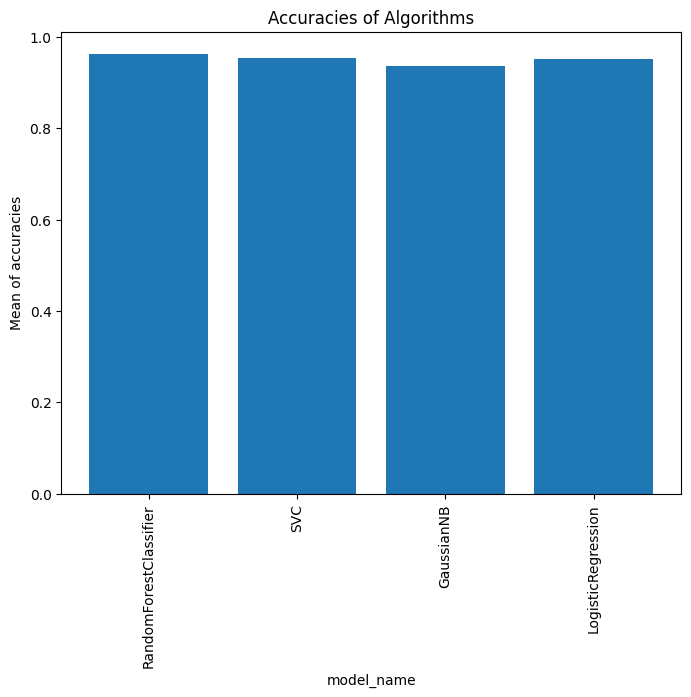

In [53]:
plt.figure(figsize=(8,6))
plt.bar(cv_df['model_name'],cv_df['accuracy'])
plt.xlabel('model_name')
plt.ylabel('Mean of accuracies')
plt.xticks(rotation='vertical')
plt.title("Accuracies of Algorithms")
plt.show()